In [85]:
#librerias
import numpy as np
from scipy.linalg import lu_factor, lu_solve, hilbert, qr, norm
import matplotlib.pyplot as plt
from scipy import integrate

In [86]:
# Parte A: Calcular el número de condición de la matriz de Hilbert
ns = [2, 3, 5, 10, 15, 20, 25]
condition_numbers = []

for n in ns:
    H = hilbert(n)
    condition_number = np.linalg.cond(H)
    condition_numbers.append(condition_number)

print("Número de condición de la matriz de Hilbert:")
for n, cn in zip(ns, condition_numbers):
    print(f"n = {n}: {cn}")

Número de condición de la matriz de Hilbert:
n = 2: 19.28147006790397
n = 3: 524.0567775860644
n = 5: 476607.2502422687
n = 10: 16024413500363.82
n = 15: 3.67568286586649e+17
n = 20: 1.3193976166344822e+18
n = 25: 1.3309197553221074e+18


In [87]:
## definimos la función teorica
def f(x, k_max=17):
    return np.sum([np.sin(k * np.pi * x) for k in range(1, k_max + 1)], axis=0)

In [88]:
#condiciones iniciales del problema
n = 20
A = hilbert(n)
x_vals = np.linspace(0, 1, 500)  # valores de x
b = np.array([integrate.quad(lambda x: f(x) * x**i, 0, 1)[0] for i in range(n)])

In [89]:
# Parte b) Aproximación utilizando el método LU
LU, piv = lu_factor(A)
c = lu_solve((LU, piv), b)

In [90]:
aproximacion1 = np.dot(np.array([x_vals**i for i in range(n)]).T, c)

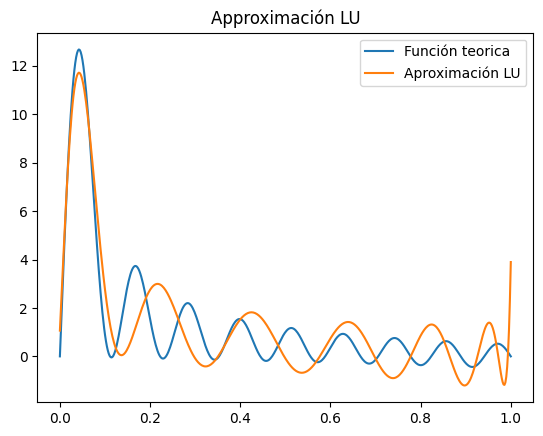

In [91]:
plt.plot(x_vals, f(x_vals), label="Función teorica")
plt.plot(x_vals, aproximacion1, label="Aproximación LU")
plt.legend()
plt.title("Approximación LU")
plt.show()

In [92]:
#Parte c: aproximación QR
Q, R = qr(A)
c = np.linalg.solve(R, np.dot(Q.T, b))

In [93]:
aproximacion2 = np.dot(np.array([x_vals**i for i in range(n)]).T, c)

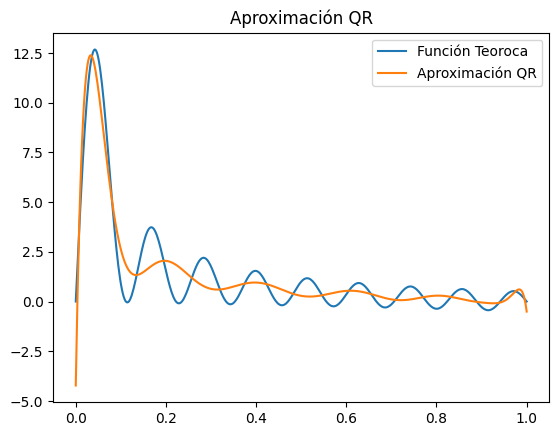

In [94]:
plt.plot(x_vals, f(x_vals), label="Función Teoroca")
plt.plot(x_vals, aproximacion2, label="Aproximación QR")
plt.legend()
plt.title("Aproximación QR")
plt.show()

In [95]:
##comparación de ambos metodos
error_lu = norm(f(x_vals) - aproximacion1)
print(f"Error con LU: {error_lu:.10e}")

error_qr = norm(f(x_vals) - aproximacion2)
print(f"Error con QR: {error_qr:.10e}")

Error con LU: 2.6800833998e+01
Error con QR: 1.8743621370e+01


Podemos concluir que el método QR parece ser mejor que el método LU en este caso, ya que tiene un error mucho más bajo.